In [1]:
# Initialize network object.
from monomerGating import *
n = network(1000.0, 1.0, 0.8, 10.0)

In [2]:
# Run simulation.
dt = 1.0e-3
tFinal = 100.0
n.evolve(dt, tFinal)

The branching rate is 5.74852296445 /s


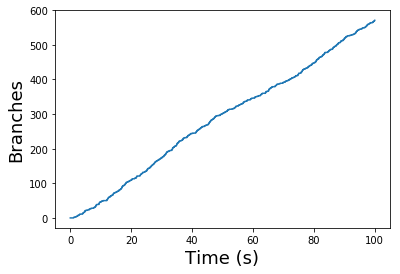

In [3]:
# Plot.
from matplotlib.pyplot import plot, xlabel, ylabel
from numpy import array, zeros, arange, gradient
from scipy.stats import linregress
%matplotlib inline

noBranchesArr = array([b for a, b, c in n.noFilaments])
noCapsArr = array([c for a, b, c in n.noFilaments])
timeArr = linspace(0.0, n.tElapsed, len(noBranchesArr))
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr, noBranchesArr)
plot(timeArr, noBranchesArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Branches", fontsize = 18)
print("The branching rate is " + str(slope) + " /s")

Text(0,0.5,'Number of actin-bound sites')

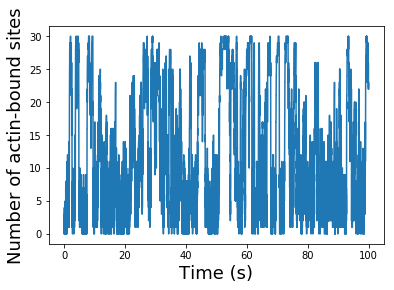

In [4]:
# WH2 domain occupancy
plot(timeArr, n.noFilledArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Number of actin-bound sites", fontsize = 18)

The capping rate is 6.90532946979 /s


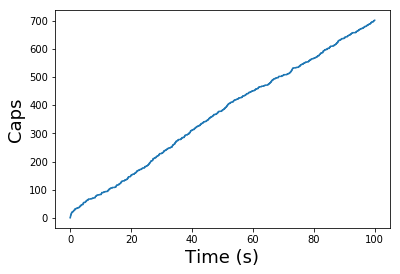

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr[:-1000], noCapsArr[:-1000])
plot(timeArr, noCapsArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Caps", fontsize = 18)
print("The capping rate is " + str(slope) + " /s")

The growth rate is 24.0357281833 nm/s


Text(0,0.5,'Leading edge position')

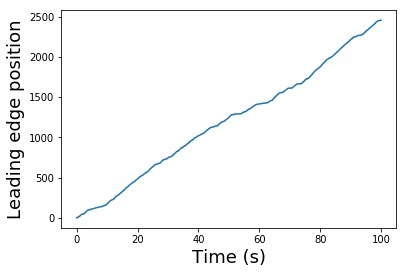

In [6]:
plot(timeArr, n.xEdge)
slope, intercept, r_value, p_value, std_err = stats.linregress(timeArr, n.xEdge)
print("The growth rate is " + str(slope) + " nm/s")
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Leading edge position", fontsize = 18)

Text(0,0.5,'Number of active filaments')

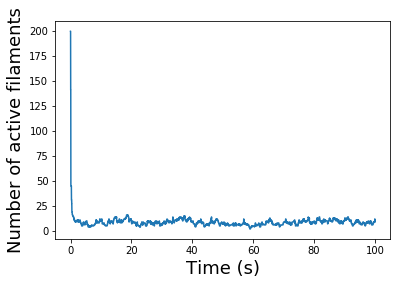

In [7]:
plot(timeArr, n.noActiveArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Number of active filaments", fontsize = 18)

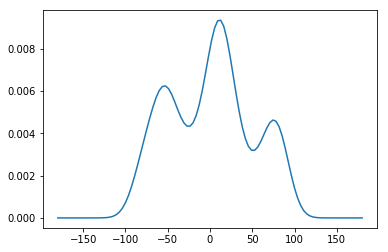

In [8]:
from scipy import stats
thetaArr = n.getAngles() / pi * 180
kde = stats.gaussian_kde(thetaArr)
x = linspace(-180, 180, 100)
p = kde(x)
plot(x, p)